In [8]:
from visual_behavior.visualization.qc import container_plots as cp
from visual_behavior.visualization.qc import data_loading as dl

In [18]:
import allensdk

In [19]:
allensdk.__version__

'1.6.0'

In [9]:
container_ids = dl.get_filtered_ophys_container_ids()

In [10]:
container_df = container_df = dl.build_container_df()

In [12]:
dl.get_ophys_experiment_id_for_ophys_session_id(881094781)

881949066

In [11]:
container_df

,container_id,container_workflow_state,first_acquistion_date,project_code,driver_line,targeted_structure,imaging_depth,equipment_name,specimen_id,sex,age_in_days,session_0,session_1,session_2,session_3,session_4,session_5,session_6,session_7,session_8,session_9
0,1006386845,holding,2020-02-25,VisualBehaviorTask1B,[Sst-IRES-Cre],VISp,275,[CAM2P.3],989489224,M,145.0,OPHYS_1_images_B 1010256573,OPHYS_2_images_B_passive 1010530054,OPHYS_3_images_B 1010812025,OPHYS_5_images_A_passive 1012112426,OPHYS_4_images_A 1012746738,OPHYS_6_images_A 1013063357,NaN,NaN,NaN,NaN
17,1006071814,holding,2020-02-13,VisualBehavior,[Sst-IRES-Cre],VISp,275,[CAM2P.3],975406504,M,155.0,OPHYS_1_images_A 1007107386,OPHYS_3_images_A 1007372463,OPHYS_2_images_A_passive 1007929142,OPHYS_4_images_B 1008318518,OPHYS_5_images_B_passive 1008738092,OPHYS_6_images_B 1009114207,NaN,NaN,NaN,NaN
18,1000740620,holding,2020-01-29,VisualBehaviorTask1B,[Vip-IRES-Cre],VISp,175,[CAM2P.4],967938399,F,160.0,OPHYS_1_images_B 1003770203,OPHYS_2_images_B_passive 1004136916,OPHYS_3_images_B 1004889552,OPHYS_4_images_A 1006270853,OPHYS_6_images_A 1006511150,OPHYS_5_images_A_passive 1006813726,NaN,NaN,NaN,NaN
23,1000740410,holding,2020-01-28,VisualBehaviorTask1B,[Vip-IRES-Cre],VISp,175,[CAM2P.3],947329076,F,191.0,OPHYS_1_images_B 1003456278,OPHYS_3_images_B 1003771765,OPHYS_2_images_B_passive 1004136930,OPHYS_4_images_A 1004403369,OPHYS_6_images_A 1004890922,OPHYS_5_images_A_passive 1005121684,NaN,NaN,NaN,NaN
24,999191979,holding,2020-01-16,VisualBehaviorTask1B,[Sst-IRES-Cre],VISp,275,[CAM2P.3],951667115,M,165.0,OPHYS_1_images_B 1000743008,OPHYS_2_images_B_passive 1001535125,OPHYS_3_images_B 1002314807,OPHYS_4_images_A 1003122317,OPHYS_5_images_A_passive 1003456269,OPHYS_6_images_A 1003771249,NaN,NaN,NaN,NaN
32,991913453,completed,2019-12-11,VisualBehaviorTask1B,[Sst-IRES-Cre],VISp,275,[CAM2P.4],910267443,M,194.0,OPHYS_1_images_B 993862620,OPHYS_2_images_B_passive 994053903,OPHYS_3_images_B 994790561,OPHYS_4_images_A 995280513,OPHYS_6_images_A 995439942,OPHYS_5_images_A_passive 995622557,NaN,NaN,NaN,NaN
34,991913246,holding,2019-12-06,VisualBehaviorTask1B,[Vip-IRES-Cre],VISp,175,[CAM2P.4],957212154,F,124.0,OPHYS_1_images_B 992868972,OPHYS_3_images_B 993341877,OPHYS_2_images_B_passive 993590480,OPHYS_4_images_A 993862120,OPHYS_5_images_A_passive 994053909,OPHYS_6_images_A 994791582,NaN,NaN,NaN,NaN
33,991913064,holding,2019-12-10,VisualBehaviorTask1B,"[Camk2a-tTA, Slc17a7-IRES2-Cre]",VISp,175,[CAM2P.3],962177507,M,117.0,OPHYS_1_images_B 993594789,OPHYS_2_images_B_passive 993863108,OPHYS_3_images_B 994056251,OPHYS_4_images_A 994278291,OPHYS_6_images_A 994790553,OPHYS_5_images_A_passive 994955433,NaN,NaN,NaN,NaN
43,989461845,completed,2019-12-04,VisualBehaviorTask1B,[Sst-IRES-Cre],VISp,275,[CAM2P.3],940744053,M,143.0,OPHYS_1_images_B 992296756,OPHYS_2_images_B_passive 992572516,OPHYS_3_images_B 992870927,OPHYS_4_images_A 993344860,OPHYS_5_images_A_passive 993593393,OPHYS_6_images_A 993864050,NaN,NaN,NaN,NaN
44,978206330,container_qc,2019-11-14,VisualBehaviorTask1B,[Sst-IRES-Cre],VISp,275,[CAM2P.3],916452082,M,148.0,OPHYS_1_images_B 982862443,OPHYS_2_images_B_passive 984551228,OPHYS_3_images_B 986402309,OPHYS_4_images_A 989191384,OPHYS_6_images_A 989594023,OPHYS_5_images_A_passive 990381322,NaN,NaN,NaN,NaN


AssertionError: length of v_in (269961) must match length of time (269960), they are off by 1

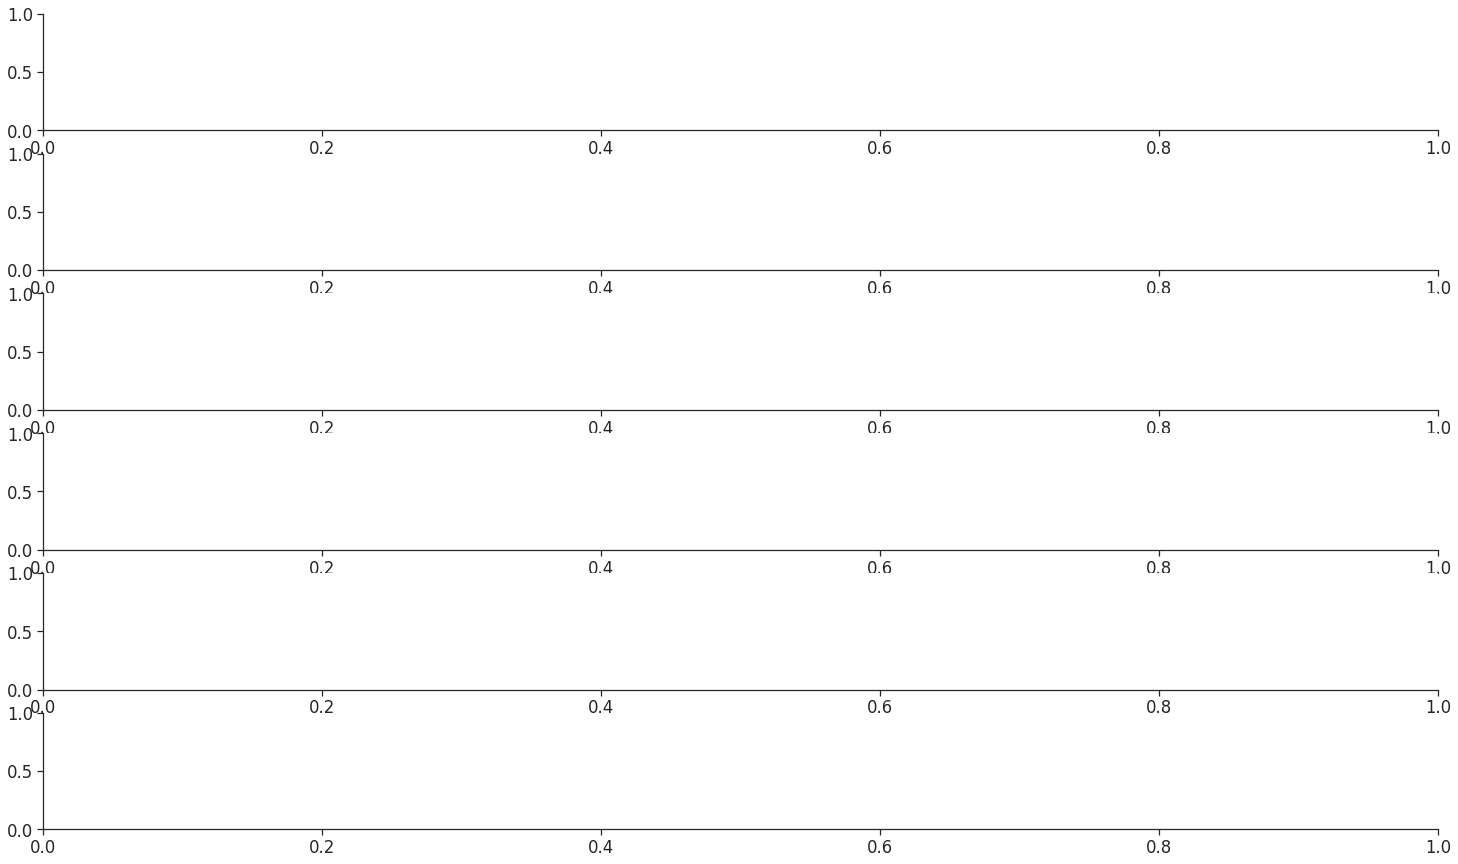

In [5]:
cp.plot_running_speed_for_container(900000006)


In [6]:
%debug

> /home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py(36)get_running_df()
     34         len(v_in),
     35         len(time),
---> 36         abs(len(v_in) - len(time))
     37     )
     38     # remove big, single frame spikes in encoder values

ipdb> u
> /home/dougo/Code/AllenSDK/allensdk/internal/api/behavior_ophys_api.py(134)get_running_data_df()
    132         behavior_stimulus_file = self.get_behavior_stimulus_file()
    133         data = pd.read_pickle(behavior_stimulus_file)
--> 134         return get_running_df(data, stimulus_timestamps)
    135 
    136     @memoize

ipdb> u
> /home/dougo/Code/AllenSDK/allensdk/api/cache.py(75)wrapper()
     73         if result is not sentinel:
     74             return result
---> 75         result = f(*args, **kwargs)
     76         cache[key] = result
     77         return result

ipdb> u
> /home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_session.py(167)running_data_df()


ipdb> u
> /home/dougo/Code/visual_behavior_analysis/visual_behavior/visualization/qc/container_plots.py(457)plot_running_speed_for_container()
    455     fig, ax = plt.subplots(6, 1, figsize=figsize)
    456     for i, ophys_session_id in enumerate(ophys_session_ids):
--> 457         ax[i] = sp.plot_running_speed(ophys_session_id, ax=ax[i])
    458         session_type = dl.get_session_type_for_ophys_session_id(ophys_session_id)
    459         ax[i].set_title(str(ophys_session_id) + '\n' + session_type)

ipdb> d
> /home/dougo/Code/visual_behavior_analysis/visual_behavior/visualization/qc/session_plots.py(21)plot_running_speed()
     19         matplotlib figure axis -- ax
     20     """
---> 21     running_speed = dl.get_sdk_running_speed(ophys_session_id)
     22     if ax is None:
     23         fig, ax = plt.subplots(figsize=(15, 3))

ipdb> d
> /home/dougo/Code/visual_behavior_analysis/visual_behavior/visualization/qc/data_loading.py(442)get_sdk_running_speed()
    440 def get_s

In [13]:
from allensdk.internal.api.behavior_ophys_api import BehaviorOphysLimsApi
from allensdk.brain_observatory.behavior.behavior_ophys_session import BehaviorOphysSession

ophys_experiment_id = 881949066
api = BehaviorOphysLimsApi(ophys_experiment_id)
session = BehaviorOphysSession(api)

running_speed = session.running_data_df['speed']

/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:40: UserWarning: time array is 1 value shorter than encoder array. Last encoder value removed

  dx = np.cumsum(dx)  # wheel rotations


In [8]:
%debug

> /home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/pandas/core/internals/managers.py(1694)construction_error()
   1692     if block_shape[0] == 0:
   1693         raise ValueError("Empty data passed with indices specified.")
-> 1694     raise ValueError(f"Shape of passed values is {passed}, indices imply {implied}")
   1695 
   1696 

ipdb> u
> /home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/pandas/core/internals/managers.py(334)_verify_integrity()
    332         for block in self.blocks:
    333             if block._verify_integrity and block.shape[1:] != mgr_shape[1:]:
--> 334                 construction_error(tot_items, block.shape[1:], self.axes)
    335         if len(self.items) != tot_items:
    336             raise AssertionError(

ipdb> u
> /home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/pandas/core/internals/managers.py(139)__init__()
    137 
    138         if do_integrity_check:
--> 139             self._verify

ipdb> len(time)
269960
ipdb> len(speed)
269960
ipdb> len(v_sig[:len(time)])
269960
ipdb> len(dx_raw)
269961
ipdb> len(speed)
269960
ipdb> q
